# Project: Wrangle and Analyze Data.
### By Diego ZUNIGA

## Gather

#### We will gather data from three sources:
- The WeRateDogs Twitter archive.
- The tweet image predictions.
- The Tweeter API.

#### - The WeRateDogs Twitter archive.

In [1]:
import pandas as pd
import requests
import io
import tweepy
import pprint
import ast
import math

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

#### - The tweet image predictions.

In [3]:
r = requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

df_images = pd.read_csv(io.StringIO(r.content.decode('utf-8')), sep='\t')


#### - The Twitter API.

For this one, I queried the API and stored the info in files so that I can delete the token and keys. Also since it takes some minutes to run I will work ahead with the stored files.

In [4]:
"""
consumer_key = 'hrjpomTLcaY0Hfroup4HHm4nd'
consumer_secret = 'j9Jyau67euknF0nigf2CTfndqQrgdhyt3QzZv0waiiniJ79VkF'
access_token = '181717339-zFlQWZh8Lq2VE08tfDRiPkoDTRif5BW0ABa5M7RX'
access_secret = 'CmVkage1vxMyshOiOxLSEwqbw9MJzD2xiiowhwpvv8a4O'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
"""

"\nconsumer_key = 'hrjpomTLcaY0Hfroup4HHm4nd'\nconsumer_secret = 'j9Jyau67euknF0nigf2CTfndqQrgdhyt3QzZv0waiiniJ79VkF'\naccess_token = '181717339-zFlQWZh8Lq2VE08tfDRiPkoDTRif5BW0ABa5M7RX'\naccess_secret = 'CmVkage1vxMyshOiOxLSEwqbw9MJzD2xiiowhwpvv8a4O'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n"

In [5]:
"""
notFoundIds = []
with open('tweet_json.txt', 'w') as f:
    for tweet_id in df.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            f.write("%s\n" % tweet._json)
        except:
            notFoundIds.append(tweet_id)
with open('notFoundTweets.txt', 'w') as f:
    f.write(str(notFoundIds))
"""

'\nnotFoundIds = []\nwith open(\'tweet_json.txt\', \'w\') as f:\n    for tweet_id in df.tweet_id:\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            f.write("%s\n" % tweet._json)\n        except:\n            notFoundIds.append(tweet_id)\nwith open(\'notFoundTweets.txt\', \'w\') as f:\n    f.write(str(notFoundIds))\n'

In [6]:
with open('notFoundTweets.txt', 'r') as f:
    notFoundIds = list(f.read())

In [7]:
data = {'id':[], 'retweet_count':[], 'favorite_count':[], 'lang':[]}
with open('tweet_json.txt', 'r') as f:
    for line in f:
        #line = f.readline()
        for k in data.keys():
            d = ast.literal_eval(line)
            data[k].append(d[k])
df_tweeter_api = pd.DataFrame(data)

## Assess

#### The gathered data will be assessed visually and programatically and the finidings will be documented below.

In [8]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_tweeter_api

,id,retweet_count,favorite_count,lang
0,892420643555336193,7986,37287,en
1,892177421306343426,5931,32062,en
2,891815181378084864,3918,24161,en
3,891689557279858688,8143,40596,en
4,891327558926688256,8817,38839,en
5,891087950875897856,2935,19509,en
6,890971913173991426,1945,11398,en
7,890729181411237888,17794,62884,en
8,890609185150312448,4035,26852,en
9,890240255349198849,6950,30761,en


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_tweeter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
lang              2333 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_tweeter_api.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2806.513073,7770.370339
std,6.820607e+16,4750.813128,12063.899750
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,562.000000,1347.000000
50%,7.184547e+17,1314.000000,3387.000000
75%,7.986654e+17,3270.000000,9532.000000
max,8.924206e+17,80643.000000,161078.000000


### Quality

#### Table 1
- Denominator not normalized ✓
- 'retweeted_status_user_id' and 'retweeted_status_id' are in scientific notation, it should be a string ✓
- Some names are None and there are many 'a' and 'the' names which is unusual. ✓
- tweet_id is an integer ✓
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' have too few data to be relevant.✓
- the minimum value in denominator is 0 which is not possible. ✓

#### Table 2
- tweet_id is an integer ✓

#### Table 3
- id column should be called tweet_id ✓
- id should be string instead of integer ✓
- lang should be called language ✓

### Tidyness

#### Table 1
- Type of dog should be one column ✓
- Rating numerator and denominator can become one column with a normalized value ✓

#### Table 2
- This table can be merged into table 1 ✓

#### Table 3
- This table can be merged into table 1 ✓
- There are retweets and we don't want them ✓

## Cleaning

In [17]:
df_clean = df.copy()

### Tidiness

- Type of dog should be one column

**Define**

Create a new column called dog_type to put the corresponding values 'doggo', 'puppo', 'floofer' or 'pupper'.
There are a few tweets with more than one value so i will create combinations since they are maximum 2 and not more than 20 rows

**Code**

In [18]:
#checking that the columns are used only with the type of dog and None
print(df.doggo.unique())
print(df.floofer.unique())
print(df.pupper.unique())
print(df.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [19]:
dogType = []
for k, i in df_clean.iterrows():
    j = 0
    name = ''
    for dog in i['doggo':'puppo']:
        if dog != 'None':
            if name == '':
                name = name + dog
            else:
                name = name + ' - ' + dog
            j = j + 1
    if j == 0:
        dogType.append(None)
    else:
        dogType.append(name)
df_clean['dog_type'] = dogType
df_clean.drop(['doggo', 'puppo', 'floofer', 'pupper'], axis=1, inplace=True);

**Test**

In [20]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


In [21]:
df_clean.dog_type.unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo - puppo',
       'doggo - floofer', 'doggo - pupper'], dtype=object)

- Rating numerator and denominator can become one column with a normalized value

**Define**

Amplify the numerator for a factor that brings the denominator to be 10 and then keep only the column with the numerator renaming it 'rating_out_of_10'

**Code**

In [22]:
rating_out_of_10 = []
for k, i in df_clean.iterrows():
    if int(i['rating_denominator']) == 0:
        rating_out_of_10.append(None)
    elif int(i['rating_denominator']) != 10:
        factor = 10 // int(i['rating_denominator'])
        rating_out_of_10.append(factor * i['rating_numerator'])
    else:
        rating_out_of_10.append(i['rating_numerator'])
df_clean['rating_out_of_10'] = rating_out_of_10
df_clean.drop(columns=['rating_denominator', 'rating_numerator'], axis=1, inplace=True)

**Test**

In [23]:
df_clean.rating_out_of_10.describe()

count    2355.000000
mean       12.135456
std        40.846771
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_out_of_10, dtype: float64

- Tables 2 and 3 can be merged to table 1

**Define**

Combine the three tables in only one

**Code**

In [25]:
df_clean = pd.merge(df_clean, df_images, on='tweet_id')
df_tweeter_api.rename(columns={'id': 'tweet_id'}, inplace=True)
df_clean = pd.merge(df_clean, df_tweeter_api, on='tweet_id')

**Test**

In [26]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'dog_type',
       'rating_out_of_10', 'jpg_url_x', 'img_num_x', 'p1_x', 'p1_conf_x',
       'p1_dog_x', 'p2_x', 'p2_conf_x', 'p2_dog_x', 'p3_x', 'p3_conf_x',
       'p3_dog_x', 'jpg_url_y', 'img_num_y', 'p1_y', 'p1_conf_y', 'p1_dog_y',
       'p2_y', 'p2_conf_y', 'p2_dog_y', 'p3_y', 'p3_conf_y', 'p3_dog_y',
       'retweet_count', 'favorite_count', 'lang'],
      dtype='object')

- There are retweets and we don't want them

**Define**

Filter the table eliminating the rows where the column in_reply_to_status_id is not None and then drop the column and also drop in_reply_to_user_id

**Code**

In [27]:
df_clean.shape

(2061, 38)

In [28]:
df_clean = df_clean[df_clean.in_reply_to_status_id.isna()]
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

**Test**

In [29]:
df_clean.shape

(2038, 36)

### Quality

- Denominator not normalized in table 1. **Solved.**
- id column should be called tweet_id were solved during tidynes cleaning. **Solved.**
- The minimum value in denominator is 0 which is not possible. **Solved.**
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' have too few data to be relevant. **Already partially solved**
- 'retweeted_status_user_id' and 'retweeted_status_id' are in scientific notation, it should be a string. **This will be solved with the last issue.**

**Define**

Drop the specified columns.

**Code**

In [31]:
df_clean.drop(columns=['retweeted_status_id',
                       'retweeted_status_user_id',
                       'retweeted_status_timestamp'], inplace=True)

**Test**

In [32]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_type,rating_out_of_10,jpg_url_x,img_num_x,...,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,7986,37287,en
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5931,32062,en
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,3918,24161,en
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8143,40596,en
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8817,38839,en


- tweet_id is an integer

**Define**

Change type to column tweet_id

**Code**

In [34]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

**Test**

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2060
Data columns (total 33 columns):
tweet_id            2038 non-null object
timestamp           2038 non-null object
source              2038 non-null object
text                2038 non-null object
expanded_urls       2038 non-null object
name                2038 non-null object
dog_type            316 non-null object
rating_out_of_10    2038 non-null float64
jpg_url_x           2038 non-null object
img_num_x           2038 non-null int64
p1_x                2038 non-null object
p1_conf_x           2038 non-null float64
p1_dog_x            2038 non-null bool
p2_x                2038 non-null object
p2_conf_x           2038 non-null float64
p2_dog_x            2038 non-null bool
p3_x                2038 non-null object
p3_conf_x           2038 non-null float64
p3_dog_x            2038 non-null bool
jpg_url_y           2038 non-null object
img_num_y           2038 non-null int64
p1_y                2038 non-null obj

- lang should be called language

**Define**

Rename the column 'lang' to 'language'

**Code**

In [36]:
df_clean.rename(columns={'lang': 'language'}, inplace=True)

**Test**

In [37]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_type,rating_out_of_10,jpg_url_x,img_num_x,...,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,retweet_count,favorite_count,language
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.07611,False,7986,37287,en


- Some names are None and there are many 'a' and 'the' names which is unusual.

**Define**

Check the names and try to find noisy data in order to drop it or reemplace it with None.

**Code**

In [72]:
unusualNames = []
for i in df_clean.name:
    if len(i) < 4:
        unusualNames.append(i)
print(unusualNames)

['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'a', 'Aja', 'Jed', 'Leo', 'Ken', 'Max', 'Ava', 'Eli', 'Ash', 'Mia', 'Leo', 'one', 'Ike', 'Mo', 'Bo', 'Bo', 'Tom', 'Ken', 'Alf', 'Sky', 'Tyr', 'Moe', 'Ted', 'Sam', 'Gus', 'Ito', 'Bo', 'Doc', 'Tyr', 'a', 'Eli', 'Bo', 'Leo', 'Bo', 'Doc', 'Jay', 'Mya', 'an', 'O', 'a', 'Al', 'Lou', 'my', 'Bo', 'Jax', 'one', 'Dex', 'Ace', 'Max', 'Zoe', 'Jax', 'Bo', 'Blu', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'Gus', 'a', 'Leo', 'Jax', 'all', 'Sid', 'a', 'a', 'Max', 'a', 'a', 'a', 'an', 'a', 'a', 'Ole', 'Bob', 'a', 'Leo', 'the', 'the', 'Obi', 'Jax', 'Bo', 'by', 'a', 'Evy', 'Tug', 'Mia', 'a', 'the', 'Ash', 'the', 'a', 'a', 'a', 'a', 'Moe', 'Jeb', 'Ava', 'Bob', 'Gus', 'a', 'one', 'a', 'Dot', 'a', 'Eve', 'Mac', 'Ed', 'a', 'Taz', 'Cal', 'Mia', 'a', 'the', 'JD', 'Jax', 'Pip', 'Lou', 'a', 'Amy', 'Gin', 'Edd', 'Sam', 'a', 'a', 'a', 'Ben', 'a', 'a', 'a', 'Dug', 'a', 'a', 'an', 'a', 'a', 'Jo', 'a', 'Ron', 'a', 'Stu', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'an', 

Looking at this list of short names we can propose a list of names in order to discard them as an error and later replace them with None.

In [73]:
notNames = ['a', 'an', 'my', 'one', 'the', 'by', 'None']
newNames = []
for i in df_clean.name:
    if i in notNames:
        newNames.append(None)
    else:
        newNames.append(i)
df_clean['name'] = newNames

**Test**

In [74]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', None, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', '

## Storing

**Finally we have a cleaner dataframe and we will store it in a file.**

In [76]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,name,dog_type,rating_out_of_10,jpg_url_x,img_num_x,...,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,retweet_count,favorite_count,language
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,7986,37287,en
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5931,32062,en
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,3918,24161,en
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8143,40596,en
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8817,38839,en
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2935,19509,en
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,13.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1945,11398,en
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,13.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,17794,62884,en
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,13.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4035,26852,en
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6950,30761,en


In [78]:
df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing

**Now with our dataframe we wil produce some visual analysis.**

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

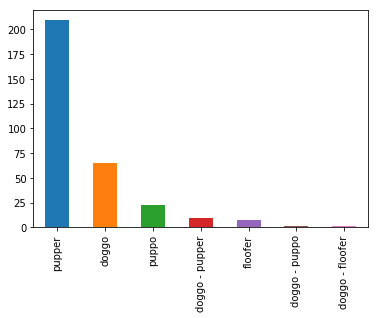

In [97]:
df_clean['dog_type'].value_counts().plot(kind='bar')

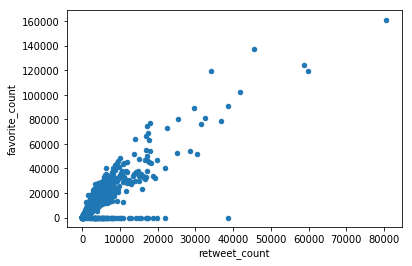

In [103]:
df_clean.plot(x='retweet_count', y='favorite_count', kind='scatter')

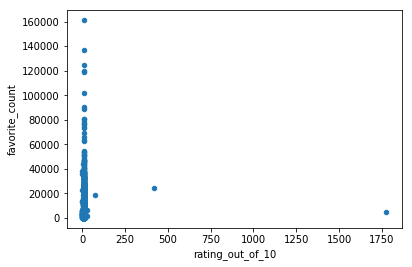

In [108]:
df_clean.plot(x='rating_out_of_10', y='favorite_count', kind='scatter')

In order to visualize it better, let's filter the highest values for rating

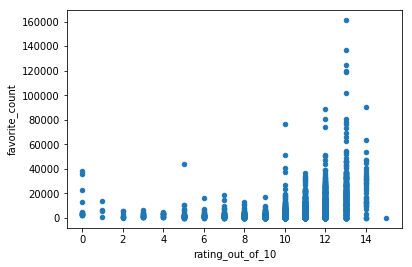

In [112]:
df_filtered = df_clean.query('rating_out_of_10 < 20')
df_filtered.plot(x='rating_out_of_10', y='favorite_count', kind='scatter')

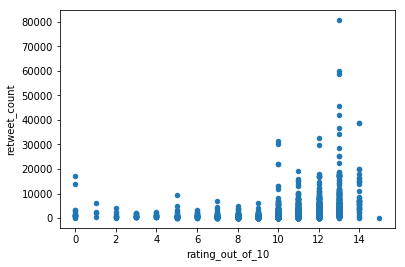

In [113]:
df_filtered.plot(x='rating_out_of_10', y='retweet_count', kind='scatter')

### Insights:

- Puppers are the most popular dogs withinh our db universe.
- There is an apparent relationship between retweet_count and favorite_count.
- Apparently the rating for the dogs was quite honest by the owners if we consider that the most rated dogs are more likely to be the most retweeted and favorited too.
